# Reconhecendo dígitos escritos à mão

Um exemplo mostrando como o scikit-learn pode ser utilizado para reconhecer imagens de dígitos escritos à mão.

Este notebook foi adaptado do notebook disponível em https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-download-auto-examples-classification-plot-digits-classification-py

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

from sklearn.model_selection import train_test_split




In [2]:
# Um exemplo de banco de dados (dígitos escritos à mão)
digits = datasets.load_digits()

In [6]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

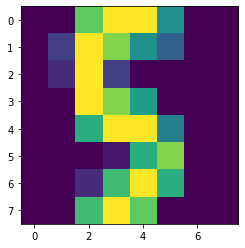

In [12]:
plt.imshow(digits.images[102])

In [17]:
n_samples = len(digits.target)

In [18]:
digits.images.shape

(1797, 8, 8)

In [19]:
data = digits.images.reshape((n_samples, -1))

In [20]:
data.shape

(1797, 64)

In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [81]:
# Vou criar um classificador (vou escolher o SVM)
classificador = svm.SVC(gamma=1e-4)

# Divido o dado em 2 conjuntos: 50% para o conjunto de treino e 50 % para o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)


In [82]:
# Utilizamos o conjunto de treino para "aprender" como classificar
classificador.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'Rótulo: 2')

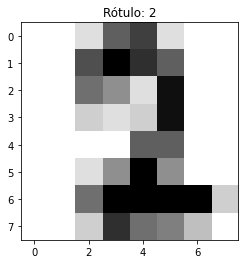

In [83]:
# E utilizamos o conjunto de teste para prever os rótulos das minhas imagens, 
# utilizando o classificador treinado

previsao = classificador.predict(X_test)

# Vamos visualizar algumas imagens treinadas
k = 300
j = int(n_samples*0.7 + k)
plt.imshow(digits.images[j],cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Rótulo: %i'%previsao[k])

In [84]:
X_test.shape

(540, 64)

In [85]:
k=200
teste0 = X_test[k].reshape(8,8)

Text(0.5, 1.0, 'Rótulo é igual a 1 - Previsao é igual a 1')

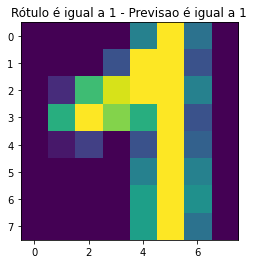

In [86]:
plt.imshow(teste0)
plt.title('Rótulo é igual a {} - Previsao é igual a {}'.format(y_test[k],previsao[k]))

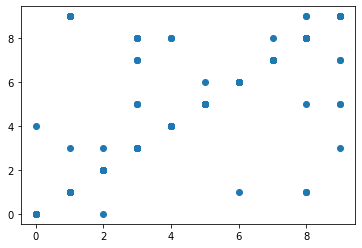

In [87]:
plt.scatter(y_test,previsao)

In [88]:
print("Relatório de classificação para o classificador %s:\n%s\n"
      % (classificador, metrics.classification_report(y_test, previsao)))

Relatório de classificação para o classificador SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.92      0.85      0.88        53
           2       1.00      0.96      0.98        53
           3       0.93      0.79      0.86        53
           4       0.98      0.95      0.96        57
           5       0.90      0.98      0.94        56
           6       0.98      0.98      0.98        54
           7       0.91      0.98      0.95        54
           8       0.84      0.88      0.86        52
           9       0.85      0.91      0.88        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg    

In [57]:
import pandas as pd

In [59]:
Dados = {'y_Actual': y_test, 
       'y_Predicted': previsao}
df = pd.DataFrame(Dados, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1   2   3   4   5   6   7   8   9
Actual                                           
0          52   0   0   0   1   0   0   0   0   0
1           0  53   0   0   0   0   0   0   0   0
2           0   0  52   1   0   0   0   0   0   0
3           0   0   0  47   0   2   0   0   4   0
4           0   0   0   0  54   0   0   0   1   2
5           0   0   0   0   0  55   1   0   0   0
6           0   1   0   0   0   0  53   0   0   0
7           0   0   0   0   0   0   0  54   0   0
8           0   1   0   0   0   0   0   0  51   0
9           0   0   0   1   0   1   0   0   0  53


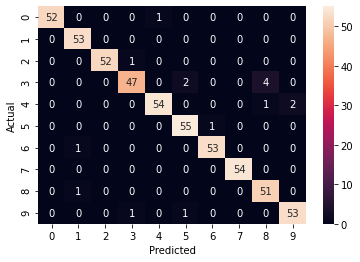

In [60]:
import seaborn as sn

sn.heatmap(confusion_matrix, annot=True)

In [61]:
from sklearn.model_selection import validation_curve
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


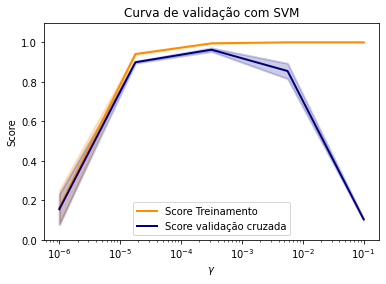

In [62]:
X= data
y = digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    svm.SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Curva de validação com SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Score Treinamento",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Score validação cruzada",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()